<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

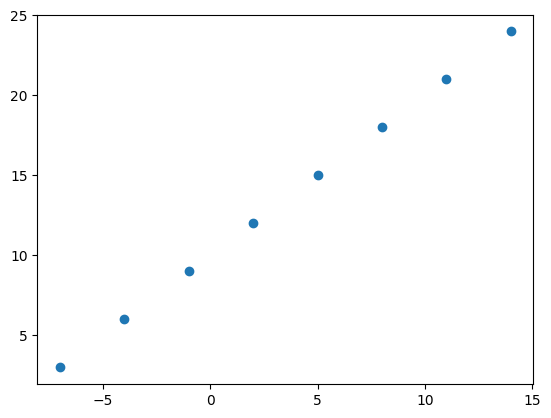

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

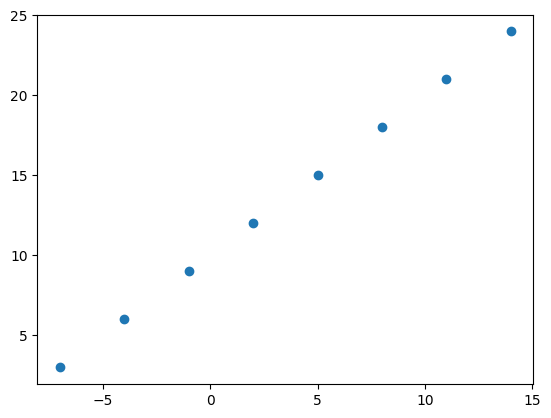

In [9]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [10]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [11]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 13.6826 - mae: 13.6826
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 13.6304 - mae: 13.6304
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 13.5791 - mae: 13.5791
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.5284 - mae: 13.5284
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 13.4781 - mae: 13.4781


In [12]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 232ms/step


array([[0.15719971]], dtype=float32)

In [14]:
y_pred + 18

array([[18.1572]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 21.6829 - mae: 21.6829
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 21.2898 - mae: 21.2898
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 20.8967 - mae: 20.8967
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 20.5180 - mae: 20.5180
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 20.2368 - mae: 20.2368
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 19.9555 - mae: 19.9555
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 19.6743 - mae: 19.6743
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 19.3930 - mae: 19.3930
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 19.1118 - mae: 19.1118
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 18.8305 - mae: 18.8305
Epoch 11/100
1/1 [==============================] -

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[29.547386]], dtype=float32)

### Create a new model

In [18]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 699ms/step - loss: 13.0926 - mae: 13.0926
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7168 - mae: 12.7168
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.3207 - mae: 12.3207
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 11.8878 - mae: 11.8878
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4148 - mae: 11.4148
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8532 - mae: 10.8532
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1804 - mae: 10.1804
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3738 - mae: 9.3738
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5388 - mae: 8.5388
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4664 - mae: 7.4664
Epoch 11/100
1/1 [==============================] - 0s

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 154ms/step


array([[29.705355]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 13.7605 - mae: 13.7605
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6940 - mae: 13.6940
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.6276 - mae: 13.6276
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5611 - mae: 13.5611
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4947 - mae: 13.4947
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4283 - mae: 13.4283
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3619 - mae: 13.3619
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.2955 - mae: 13.2955
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2291 - mae: 13.2291
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1627 - mae: 13.1627
Epoch 11/100
1/1 [==============================

In [21]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[30.836876]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

# When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100.0, 100.0, 4)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

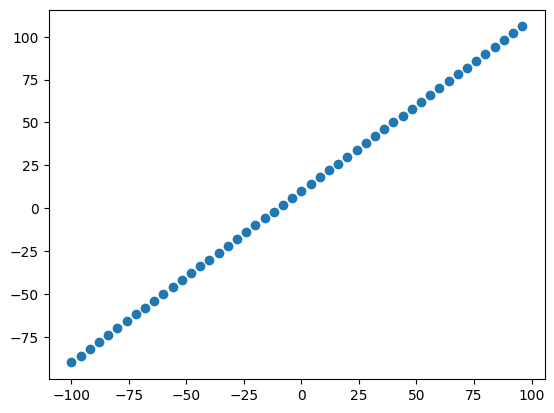

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which typically
constitutes 70-80% of the total available data.
* **Validation set** - the model is fine-tuned on this data, typically representing 10-15% of the available data.
* **Test set** - the model is evaluated on this data to assess what it has learned; this set typically accounts for 10-15% of the total available data.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

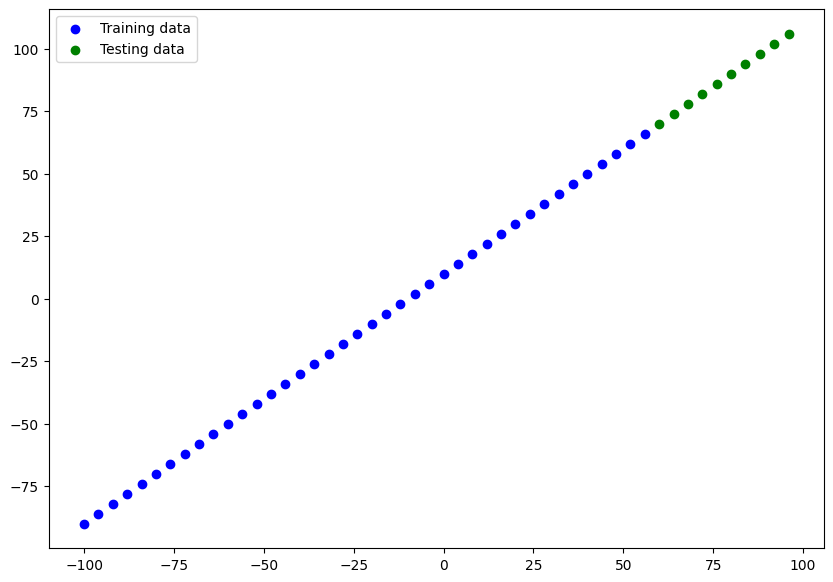

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [29]:
# Let's have a look at how to build a neural network for our data

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # Fit
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

### Visualizing the model

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer1"),
    tf.keras.layers.Dense(10, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* Trainable parameters -these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [33]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [34]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


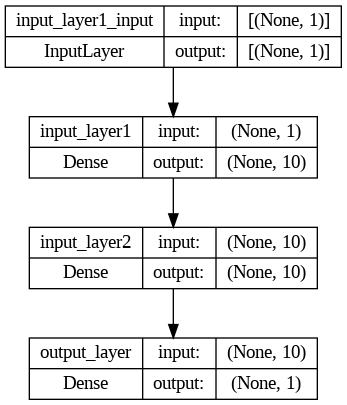

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true`
versus `y_pred` (ground truth versus your model's predictions).

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 69ms/step


array([[114.89788],
       [122.44016],
       [129.98244],
       [137.52472],
       [145.067  ],
       [152.60927],
       [160.15154],
       [167.69383],
       [175.2361 ],
       [182.7784 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [38]:
 # Let's create a plotting function
def plot_predictions(training_data=X_train,
                      training_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
   """
   Plots training data, test data and compares predictions to ground truth labels.
   """

   plt.figure(figsize=(10, 7))
   # Plot training data in blue
   plt.scatter(training_data, training_labels, c='b', label="Training data")
   # Plot testing data in green
   plt.scatter(test_data,test_labels, c='g', label="Testing data")
   #Plot model's predictions in red
   plt.scatter(test_data, predictions, c='r', label="Predictions")
   # Show the legend
   plt.legend();

In [39]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [40]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, name="input_layer0"),
    tf.keras.layers.Dense(15, name="input_layer1"),
    tf.keras.layers.Dense(13, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# fit
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=190, verbose=1)

Epoch 1/190
2/2 [==============================] - 1s 19ms/step - loss: 28.3104 - mae: 28.3104
Epoch 2/190
2/2 [==============================] - 0s 13ms/step - loss: 24.7047 - mae: 24.7047
Epoch 3/190
2/2 [==============================] - 0s 18ms/step - loss: 21.6180 - mae: 21.6180
Epoch 4/190
2/2 [==============================] - 0s 11ms/step - loss: 18.2924 - mae: 18.2924
Epoch 5/190
2/2 [==============================] - 0s 10ms/step - loss: 15.0524 - mae: 15.0524
Epoch 6/190
2/2 [==============================] - 0s 10ms/step - loss: 12.1000 - mae: 12.1000
Epoch 7/190
2/2 [==============================] - 0s 15ms/step - loss: 9.9396 - mae: 9.9396
Epoch 8/190
2/2 [==============================] - 0s 9ms/step - loss: 9.6530 - mae: 9.6530
Epoch 9/190
2/2 [==============================] - 0s 10ms/step - loss: 9.8917 - mae: 9.8917
Epoch 10/190
2/2 [==============================] - 0s 13ms/step - loss: 9.8852 - mae: 9.8852
Epoch 11/190
2/2 [==============================] - 0s 14m

In [41]:
# Make some predictions
y_pred = model2.predict(X_test)
y_pred

1/1 [==============================] - 1s 545ms/step


array([[ 71.78942 ],
       [ 75.90361 ],
       [ 80.01778 ],
       [ 84.13195 ],
       [ 88.246155],
       [ 92.36032 ],
       [ 96.47451 ],
       [100.58871 ],
       [104.70287 ],
       [108.817055]], dtype=float32)

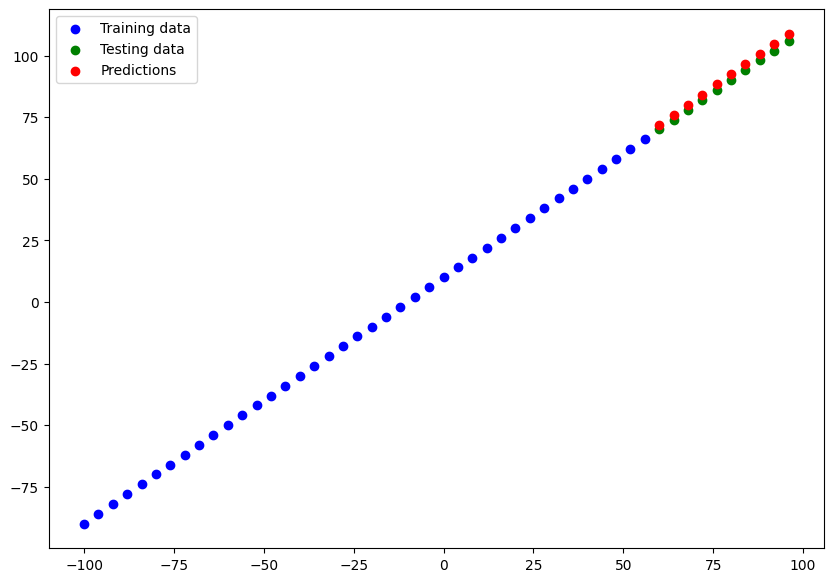

In [42]:
plot_predictions(training_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors."

In [43]:
# Evaluate the model on the test
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 195ms/step - loss: 2.3032 - mae: 2.3032


[2.3032402992248535, 2.3032402992248535]

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                              y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.568462, 13.657834, 11.59289 , 10.37361 , 10.      , 10.472064,
       11.789804, 13.953224, 16.9623  , 20.817055], dtype=float32)>

In [45]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.78942 ],
       [ 75.90361 ],
       [ 80.01778 ],
       [ 84.13195 ],
       [ 88.246155],
       [ 92.36032 ],
       [ 96.47451 ],
       [100.58871 ],
       [104.70287 ],
       [108.817055]], dtype=float32)>

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [47]:
# Let's get rid of that one dimension (10, 1) --> (10,)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.78942 ,  75.90361 ,  80.01778 ,  84.13195 ,  88.246155,
        92.36032 ,  96.47451 , 100.58871 , 104.70287 , 108.817055],
      dtype=float32)>

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.303238>

In [49]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.4124646>

In [50]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 18.9351 - mae: 18.9351
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.5250 - mae: 11.5250
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11.5061 - mae: 11.5061
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4310 - mae: 9.4310
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.3206 - mae: 10.3206
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5642 - mae: 9.5642
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6817 - mae: 8.6817
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0494 - mae: 9.0494
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.0383 - mae: 19.0383
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2706 - mae: 10.2706
Epoch 11/100
2/2 [==============================] - 0s 15ms/st

1/1 [==============================] - 0s 60ms/step


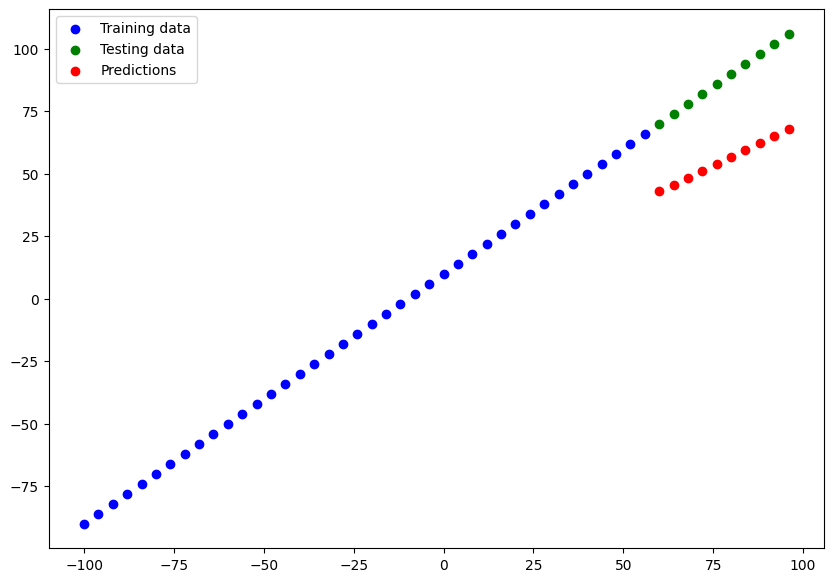

In [52]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.60006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1075.1785>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [54]:
X_train.ndim, y_train.ndim

(1, 1)

In [55]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 19ms/step - loss: 48.3596 - mse: 3406.3738
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 35.2285 - mse: 1786.3896
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 31.0607 - mse: 1449.4576
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 16.5501 - mse: 402.2972
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 22.4065 - mse: 735.4352
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 11.5855 - mse: 153.2492
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.6882 - mse: 215.6497
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1130 - mse: 152.1551
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 40.3070 - mse: 2553.8301
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.7251 - mse: 1082.4534
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 65ms/step


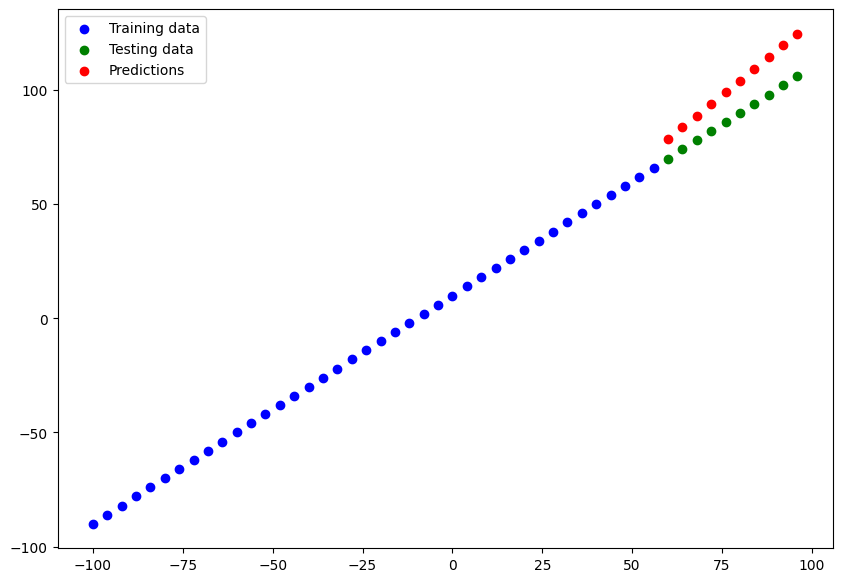

In [56]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.618744>,
 <tf.Tensor: shape=(), dtype=float32, numpy=195.80408>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [58]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 471ms/step - loss: 157.6351 - mae: 157.6351
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 18.1048 - mae: 18.1048
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 98.6731 - mae: 98.6731
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 71.7286 - mae: 71.7286
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 34.0312 - mae: 34.0312
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 83.0908 - mae: 83.0908
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 79.7111 - mae: 79.7111
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 61.7511 - mae: 61.7511
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 4.8813 - mae: 4.8813
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 175.2956 - mae: 175.2956
Epoch 11/500
1/1 [============================

1/1 [==============================] - 0s 120ms/step


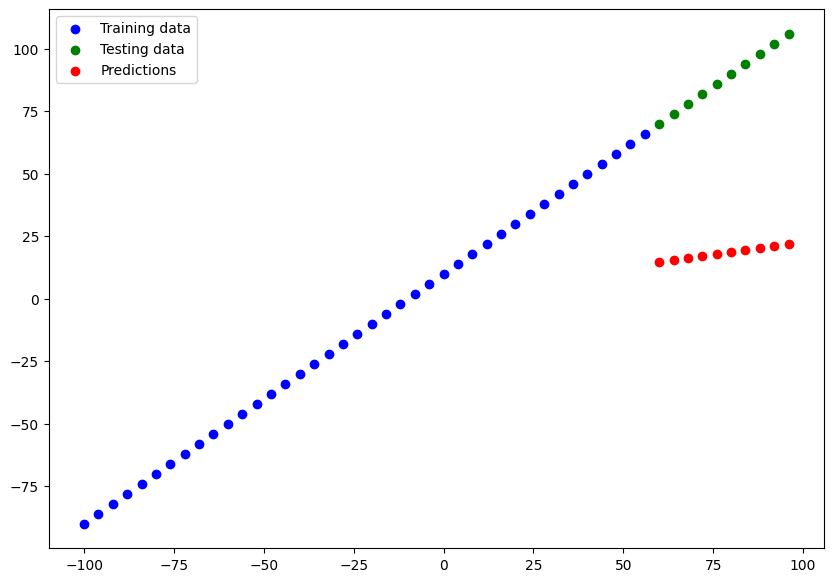

In [59]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=69.632095>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4931.664>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [61]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.600060,1075.178467
1,model_2,13.618744,195.804077
2,model_3,69.632095,4931.664062


Looks like `model_2` performed the best...

In [62]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* **Weights & Biases** - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving out models

Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formatns we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [65]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [66]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
